# K-means: California housing

In [ ]:
# Handle imports up-front
import pandas as pd

## 1. Data loading
### 1.1. Load

In [2]:
raw_data_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

### 1.2. Inspect

In [3]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 1.3. Remove unnecessary features

In [4]:
data_df=raw_data_df[['MedInc', 'Latitude', 'Longitude']]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


### 1.4. Test-train split

In [ ]:
# Your code here...

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     16512 non-null  float64
 1   Latitude   16512 non-null  float64
 2   Longitude  16512 non-null  float64
dtypes: float64(3)
memory usage: 516.0 KB


## 2. EDA
### 2.1. Missing, and/or extreme values

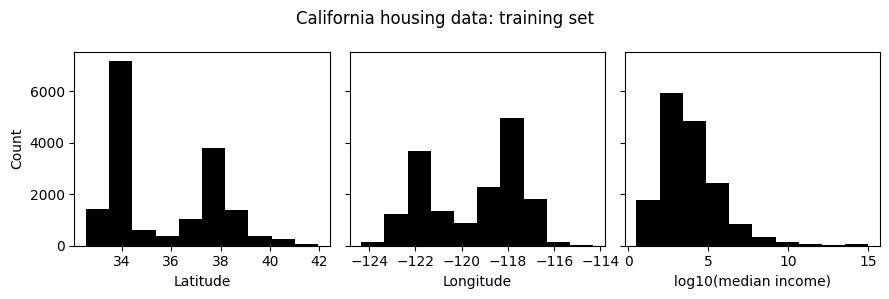

In [ ]:
# Your code here...

# The dataset is pretty clean already, and we only have three features - but it never hurts to plot a few histograms to take a look at the shape of the data

### 2.2. Feature scaling

In [ ]:
# The 4Geeks provided solution skips this part - but it's important! If one feature has a much larger range than the others, it will be given more importance during distance calculations...

## 3. Clustering

### 3.1. Find clusters

In [ ]:
# Use Scikit-learn's KMeans()

### 3.2. Add cluster label to training data

In [ ]:
# Add the clusters from the KMeans model as the new label - now we have turned our unsupervised machine learning problem into a supervised one!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     16512 non-null  float64
 1   Latitude   16512 non-null  float64
 2   Longitude  16512 non-null  float64
 3   cluster    16512 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 451.6 KB


### 3.3. Plot results

In [1]:
# If you scaled the data properly, you should notice that your clusters are much cleaner than the 4Geeks solution - which basically just cuts california in half and then stratifies it by median income because that was the feature with the largest range in values!

## 4. Supervised classification model
### 4.1. Features & labels

In [ ]:
# Re-seperate the feaurtes and labels to train a supervised classifier

,MedInc,Latitude,Longitude
0,0.190322,0.017021,0.729084
1,0.228452,0.129787,0.616534
2,0.252162,0.224468,0.385458
3,0.099488,0.014894,0.721116
4,0.210638,0.450000,0.453187


### 4.2. Model training

In [ ]:
# Pick any classification model you like

### 4.3. Cross-validation

In [ ]:
# You can re-use the 'cross_val' helper function we wrote for the naive bayes project here (look in src/utils.py in my copy of the repo. from the course materials repo. list).

Cross-validation accuracy: 99.44 +/- 0.21%


### 4.4. Model evaluation

In [ ]:
# Your code here...

Supervised model is 99.4% accurate on the held-out test data.
